# Supervised Learning : Regression

## 1 Cars4U Project
### 1.1 Objective
- Explore and visualize the dataset.
- Build a linear regression model to predict the prices of used cars.
- Generate a set of insights and recommendations that will help the business. 

### 1.2 Data:
- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000) 

### 1.3 Problem definition and questions to be answered
In this project we want to analyze how different characteristics of used cars impact the Price of the car. The questions to be answer are:
- Does the brand and model of the car impact the price?
- Do luxury brands increase the price of the car?
- How much the total kilometers driven impact the price?
- Is more profitable to trade cars in some locations than others?
- What is the impact of the Fuel Type, Transmission, Mileage, Engine, Power and Seats on the price?
- Is there are relationship between the price of new cars and used cars?

## 2 Import packages and turnoff warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import pandas_profiling
sns.set(color_codes=True)
%matplotlib inline

## 3 Import dataset and quality of data

In [5]:
# read data from csv file
data = pd.read_csv(r"C:\Users\AndresDelgadillo\Downloads\used_cars_data.csv")

In [6]:
# get columns
data.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [7]:
# get size of dataset
data.shape

(7253, 14)

In [8]:
# check dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [9]:
# check dataset missing values
total = data.isnull().sum().sort_values(ascending=False) # total number of null values
print(total)

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64


- There are 7253 rows and 14 columns. 
- 'New_Price' and 'Price' columns have a big number of missing values, and that could affect the results of the analysis. `A more deep study is necessary to deal with all missing values`

## 4 Characteristics of the data

In [10]:
# check first rows of data
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [11]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [12]:
# get a random sample of data
np.random.seed(1) #setting the random seed via np.random.seed to get the same random results every time
data.sample(n=5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34


- 'Name' column could be split in 2 columns. The first column would be the brand and the second column the model of the car
- 'Location', 'Fuel_Type', 'Transmission', and 'Owner_Type' columns could be transformed to 'category'
- 'Mileage', 'Engine', 'Power', and 'New_Price' columns should be numerical values but they appear as 'object'. `Processing columns is necessary to convert them to numerical`
- 'S.No' is the same as the index of the dataset and we can drop the column

## 5 Processing columns
### 5.1 Mileage
This column is the standard mileage offered by the car company in kmpl or km/kg. We are going to split the column between values and units to see if there is a relation between Fuel_Type and Mileage 

In [14]:
# Split Mileage column to extract units
data[['Mileage','Unit']] = data['Mileage'].str.split(' ',n=2,expand=True)

In [15]:
# Get unique pairs of Fuel_Type and Unit
data.groupby(['Fuel_Type','Unit']).size()

Fuel_Type  Unit 
CNG        km/kg      62
Diesel     kmpl     3852
LPG        km/kg      12
Petrol     kmpl     3325
dtype: int64

There is a clear relation between 'Fuel_Type' and 'Unit'. 
- Mileage for CNG and LPG are in km/kg 
- Mileage for Diesel and Petrol are in kmpl
It is not necessary to convert the units because Fuel_Type column will help to identify this information.

Now, we can convert Mileage to numeric and drop the Unit column

In [16]:
# drop Name column
data.drop(['Unit'], axis=1, inplace=True)

In [17]:
# Convert Mileage to Number
data['Mileage']=data['Mileage'].astype('float64')

In [18]:
# check Mileage is number
data['Mileage'].head()

0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage, dtype: float64

### 5.2 Engine
'CC' string is going to be deleted

In [19]:
def engine_to_num(engine):
    """This function takes in a string representing the engine and converts it to a number. 
    This function returns the same engine value if the input is already numeric."""
    if isinstance(engine, str):  # checks if engine is a string
        engine_val = float(engine.replace('CC', '').strip())
    else:  # this happens when the engine is already number or nan
        engine_val = engine
    # return engine as number
    return engine_val

# apply engine_to_num function to column 'Engine'
data['Engine'] = data['Engine'].apply(engine_to_num)

In [20]:
# check Engine is number
data['Engine'].head()

0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: Engine, dtype: float64

### 5.3 Power
'bhp' string is going to be deleted

In [21]:
def power_to_num(power):
    """This function takes in a string representing the power and converts it to a number. 
    This function returns the same power value if the input is already numeric."""
    if isinstance(power, str):  # checks if power is a string
        power_val = power.replace('bhp', '').strip()
        if power_val != 'null': # check that there is a value 
            power_val = float(power_val)
        else:
            power_val = np.nan # returns nan
    else:  # this happens when the power is already number or nan
        power_val = power
    # return power as number
    return power_val

# apply engine_to_num function to column 'Engine'
data['Power'] = data['Power'].apply(power_to_num)

In [22]:
# check Power is number
data['Power'].head()

0     58.16
1    126.20
2     88.70
3     88.76
4    140.80
Name: Power, dtype: float64

### 5.4 New_Price
'Lakh' and 'Cr' strings are going to be deleted.
- 1 Cr = 100 Lakh

In [23]:
def price_to_num(price):
    """This function takes in a string representing the price and converts it to a number. 
    This function returns the same price value if the input is already numeric."""
    if isinstance(price, str):  # checks if price is a string
        # handles Cr and Lakh units
        if price.endswith('Lakh'):
            multiplier = 1
        elif price.endswith('Cr'):
            multiplier = 100
        price_val = float(price.replace('Lakh', '').replace('Cr', '').strip()) * multiplier
    else:  # this happens when the price is already number or nan
        price_val = price
    # return price as number
    return price_val

# apply price_to_num function to column 'New_Price'
data['New_Price'] = data['New_Price'].apply(price_to_num)

In [24]:
# check Price is number
data['New_Price'].head()

0     NaN
1     NaN
2    8.61
3     NaN
4     NaN
Name: New_Price, dtype: float64

### 5.5 Featuring Engineering
#### Name
The Name column represents Brand, Model and Specs of the car. We are going to split this column in 3 columns to get that information

In [26]:
data[['Brand','Model','Specs']] = data['Name'].str.split(' ',n=2,expand=True)

In [27]:
data[['Name','Brand','Model','Specs']].head()

,Name,Brand,Model,Specs
0,Maruti Wagon R LXI CNG,Maruti,Wagon,R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta,1.6 CRDi SX Option
2,Honda Jazz V,Honda,Jazz,V
3,Maruti Ertiga VDI,Maruti,Ertiga,VDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4,New 2.0 TDI Multitronic


Now, we can drop 'Name' column and use 'Brand', 'Model' and 'Specs' columns

In [28]:
# drop Name column
data.drop(['Name'], axis=1, inplace=True)

### 5.6 Category columns
'Brand', 'Model', 'Specs', 'Location', 'Fuel_Type', 'Transmission', and 'Owner_Type' columns are transformed to category

In [29]:
data['Brand']=data['Brand'].astype('category')
data['Model']=data['Model'].astype('category')
data['Specs']=data['Specs'].astype('category')
data['Location']=data['Location'].astype('category')
data['Fuel_Type']=data['Fuel_Type'].astype('category')
data['Transmission']=data['Transmission'].astype('category')
data['Owner_Type']=data['Owner_Type'].astype('category')

### 5.7 Drop 'S.No.' column

In [30]:
data.drop(['S.No.'], axis=1, inplace=True)

### 5.8 Duplicate rows

In [31]:
# show all rows with duplicates 
data[data.duplicated(keep=False)]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Specs
6498,Mumbai,2010,52000,Petrol,Manual,First,17.0,1497.0,118.0,5.0,NaN,NaN,Honda,City,1.5 E MT
6582,Mumbai,2010,52000,Petrol,Manual,First,17.0,1497.0,118.0,5.0,NaN,NaN,Honda,City,1.5 E MT


In [32]:
# drop duplicate rows
data.drop(data[data.duplicated()].index, axis=0, inplace=True)

In [33]:
# Check there are no duplicates 
data.duplicated().sum()

0

### 5.8 Check characteristics of data after processing

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   category
 1   Year               7252 non-null   int64   
 2   Kilometers_Driven  7252 non-null   int64   
 3   Fuel_Type          7252 non-null   category
 4   Transmission       7252 non-null   category
 5   Owner_Type         7252 non-null   category
 6   Mileage            7250 non-null   float64 
 7   Engine             7206 non-null   float64 
 8   Power              7077 non-null   float64 
 9   Seats              7199 non-null   float64 
 10  New_Price          1006 non-null   float64 
 11  Price              6019 non-null   float64 
 12  Brand              7252 non-null   category
 13  Model              7252 non-null   category
 14  Specs              7251 non-null   category
dtypes: category(7), float64(6), int64(2)
memory usage: 665.0 KB


In [35]:
# check first rows of data
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Specs
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4,New 2.0 TDI Multitronic


Data series are the correct Type. 

## 6 Exploratory data analysis
### 6.1 Pandas profiling report
We can get a first statistical and descriptive analysis using pandas_profiling

In [36]:
# get pandas profiling report
#pandas_profiling.ProfileReport(data)

### 6.2 Pairplot

We are going to perform univariate and bivariate analysis to understand the relationship between the columns

In [37]:
#sns.pairplot(data, diag_kind='kde');

### 6.3 Univariate analysis

#### 6.3.1 Numerical columns

In [38]:
# Get stats for numerical columns
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,7252.000000,7.252000e+03,7250.000000,7206.000000,7077.000000,7199.000000,1006.000000,6019.000000
mean,2013.365830,5.869999e+04,18.141738,1616.590064,112.764474,5.279761,22.779692,9.479468
std,3.254405,8.443351e+04,4.562492,595.324779,53.497297,0.811709,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.342900e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


In [40]:
# Get the skewness of numerical columns
data.select_dtypes(include=np.number).skew()

Year                 -0.840219
Kilometers_Driven    61.578378
Mileage              -0.438397
Engine                1.412244
Power                 1.961084
Seats                 1.902039
New_Price             4.128300
Price                 3.335232
dtype: float64

##### 6.3.1.1 Year
The Year distribution is slightly skewed to the left. The mean is 2013.36 and the median 2014, and there are not outliers.

##### 6.3.1.2 Kilometers_Driven
The Kilometers_Driven distribution is highly skewed to the right. The mean is 58,699 km, the median 53,416 km, and there are several outliers as we can see in the chart below.

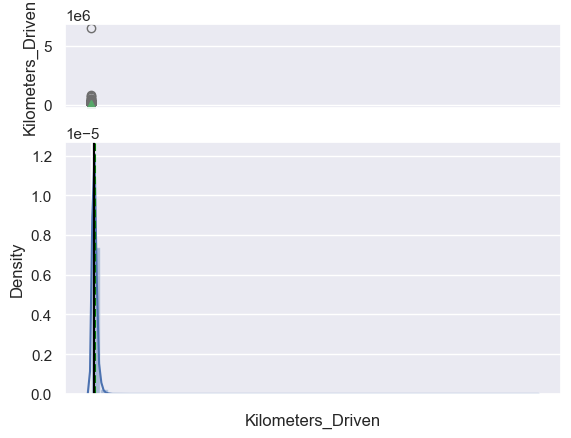

In [41]:
# creating the 2 subplots
f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                       sharex = True, # x-axis will be shared among all subplots
                                       gridspec_kw = {"height_ratios": (.25, .75)});
sns.boxplot(data['Kilometers_Driven'], ax=ax_box2, showmeans=True, color='violet'); # boxplot 
sns.distplot(data['Kilometers_Driven'], kde=True, ax=ax_hist2); # histogram
ax_hist2.axvline(np.mean(data['Kilometers_Driven']), color='green', linestyle='--'); # Add mean to the histogram
ax_hist2.axvline(np.median(data['Kilometers_Driven']), color='black', linestyle='-'); # Add median to the histogram

##### 6.3.1.3 Mileage
The Mileage distribution is fairly symmetrical. The mean is 18.14 and the median 18.16. However, there are 81 rows with value equal to 0

In [42]:
# Number of rows with mileage equals to 0 
sum(data['Mileage']==0) 

81

##### 6.3.1.4 Engine|
The Engine distribution is skewed to the right. The mean is 1616 and the median 1493

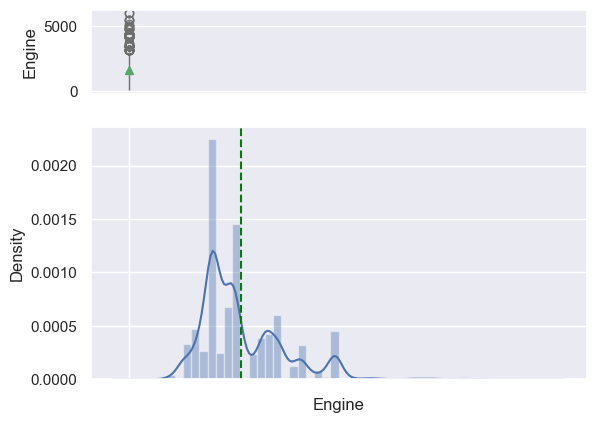

In [43]:
# creating the 2 subplots
f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                       sharex = True, # x-axis will be shared among all subplots
                                       gridspec_kw = {"height_ratios": (.25, .75)});
sns.boxplot(data['Engine'], ax=ax_box2, showmeans=True, color='violet'); # boxplot 
sns.distplot(data['Engine'], kde=True, ax=ax_hist2); # histogram
ax_hist2.axvline(np.mean(data['Engine']), color='green', linestyle='--'); # Add mean to the histogram
ax_hist2.axvline(np.median(data['Engine']), color='black', linestyle='-'); # Add median to the histogram

`Engine` has several values that are flagged as suspicious by the boxplot. However, those values are consistent with some powerful car models and we cannot considered them as outliers

In [44]:
# cars with Engine>3000
data[data['Engine']>3000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Specs
70,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.0,5.0,NaN,14.50,Porsche,Cayenne,2009-2014 Turbo
152,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,NaN,30.00,Mercedes-Benz,S,Class 2005 2013 S 500
459,Coimbatore,2016,51002,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,NaN,48.91,Audi,Q7,4.2 TDI Quattro Technology
586,Kochi,2014,79926,Diesel,Automatic,First,11.33,4134.0,335.2,7.0,NaN,29.77,Audi,Q7,4.2 TDI Quattro Technology
589,Bangalore,2006,47088,Petrol,Automatic,Second,10.13,3498.0,364.9,5.0,NaN,19.00,Mercedes-Benz,S,Class 2005 2013 S 350 L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011,Hyderabad,2009,53000,Petrol,Automatic,First,0.00,3597.0,262.6,5.0,NaN,4.75,Skoda,Superb,3.6 V6 FSI
6186,Mumbai,2008,65000,Petrol,Automatic,Third,10.13,3498.0,364.9,5.0,NaN,NaN,Mercedes-Benz,S,Class 2005 2013 S 350 L
6354,Bangalore,2008,31200,Petrol,Automatic,Second,10.20,5998.0,616.0,5.0,375.0,NaN,Bentley,Flying,Spur W12
6842,Kolkata,2012,14850,Petrol,Automatic,First,10.00,3696.0,328.5,2.0,NaN,NaN,Nissan,370Z,AT


##### 6.3.1.5 Power
The Power distribution is skewed to the right. The mean is 112 and the median 94

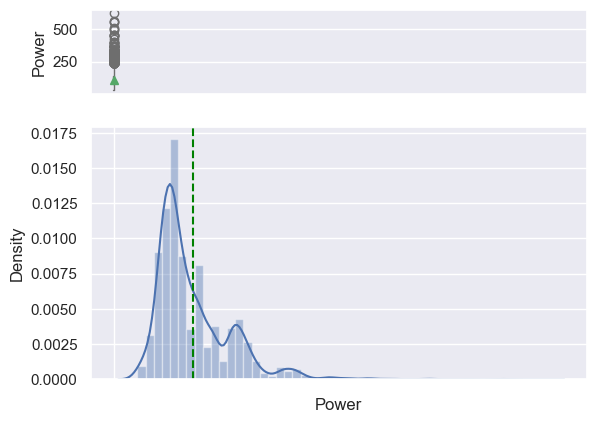

In [45]:
# creating the 2 subplots
f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                       sharex = True, # x-axis will be shared among all subplots
                                       gridspec_kw = {"height_ratios": (.25, .75)});
sns.boxplot(data['Power'], ax=ax_box2, showmeans=True, color='violet'); # boxplot 
sns.distplot(data['Power'], kde=True, ax=ax_hist2); # histogram
ax_hist2.axvline(np.mean(data['Power']), color='green', linestyle='--'); # Add mean to the histogram
ax_hist2.axvline(np.median(data['Power']), color='black', linestyle='-'); # Add median to the histogram

At the same as Engine. Power has several values that are flagged as suspicious by the boxplot. However, those values are consistent with some powerful car models and we cannot considered them as outliers

##### 6.3.1.6 Seats
6047 cars (83.4%) have 5 seats. There is one car with 0 seats and 53 with missing values. 
##### 6.3.1.7 New_Price
The New_Price distribution is skewed to the right. The mean is 22.7 and the median 11.5

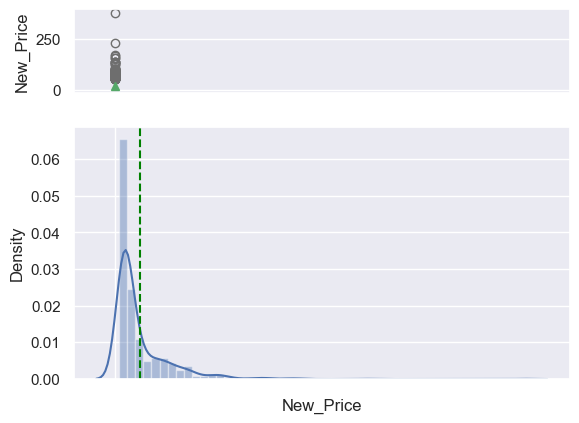

In [46]:
# creating the 2 subplots
f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                       sharex = True, # x-axis will be shared among all subplots
                                       gridspec_kw = {"height_ratios": (.25, .75)});
sns.boxplot(data['New_Price'], ax=ax_box2, showmeans=True, color='violet'); # boxplot 
sns.distplot(data['New_Price'], kde=True, ax=ax_hist2); # histogram
ax_hist2.axvline(np.mean(data['New_Price']), color='green', linestyle='--'); # Add mean to the histogram
ax_hist2.axvline(np.median(data['New_Price']), color='black', linestyle='-'); # Add median to the histogram

There are several values flagged as suspicious by the boxplot, but they could correspond to luxury cars, and we cannot considered as outliers 

In [47]:
# cars with New_Price>100
data[data['New_Price']>100]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Specs
148,Mumbai,2013,23000,Petrol,Automatic,First,11.05,2894.0,444.00,4.0,128.0,37.00,Audi,RS5,Coupe
327,Coimbatore,2017,97430,Diesel,Automatic,First,14.75,2967.0,245.00,7.0,104.0,62.67,Audi,Q7,45 TDI Quattro Technology
1336,Mumbai,2016,20002,Diesel,Automatic,First,14.75,2967.0,245.00,7.0,104.0,67.00,Audi,Q7,45 TDI Quattro Technology
1505,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,139.0,97.07,Land,Rover,Range Rover Sport SE
1885,Delhi,2018,6000,Diesel,Automatic,First,11.00,2987.0,258.00,7.0,102.0,79.00,Mercedes-Benz,GLS,350d Grand Edition
2056,Kochi,2015,29966,Diesel,Automatic,Second,16.77,2993.0,261.49,5.0,140.0,43.60,BMW,7,Series 730Ld Eminence
2095,Coimbatore,2019,2526,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,106.0,83.96,Mercedes-Benz,SLC,43 AMG
2178,Mumbai,2017,35000,Diesel,Automatic,First,18.00,2993.0,255.00,7.0,127.0,41.60,Land,Rover,Discovery HSE Luxury 3.0 TD6
2528,Delhi,2016,59000,Diesel,Automatic,First,18.00,2993.0,255.00,7.0,113.0,36.75,Land,Rover,Discovery SE 3.0 TD6
3132,Kochi,2019,14298,Petrol,Automatic,First,13.33,2995.0,340.00,5.0,136.0,2.02,Porsche,Cayenne,Base


##### 6.3.1.8 Price
The Price distribution is skewed to the right. The mean is 9.4 and the median 5.6

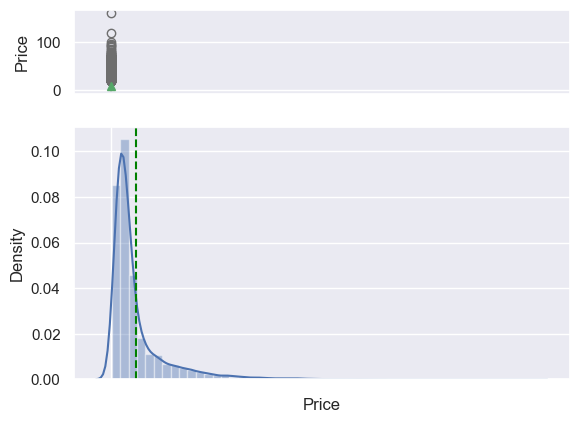

In [48]:
# creating the 2 subplots
f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                       sharex = True, # x-axis will be shared among all subplots
                                       gridspec_kw = {"height_ratios": (.25, .75)});
sns.boxplot(data['Price'], ax=ax_box2, showmeans=True, color='violet'); # boxplot 
sns.distplot(data['Price'], kde=True, ax=ax_hist2); # histogram
ax_hist2.axvline(np.mean(data['Price']), color='green', linestyle='--'); # Add mean to the histogram
ax_hist2.axvline(np.median(data['Price']), color='black', linestyle='-'); # Add median to the histogram

Similar than New_Price. There are several values flagged as suspicious by the boxplot, but they could correspond to luxury cars, and we cannot considered as outliers

In [49]:
# cars with Price>25
data[data['Price']>25]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Specs
13,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,27.00,Land,Rover,Range Rover 2.2L Pure
19,Bangalore,2014,78500,Diesel,Automatic,First,14.84,2143.0,167.62,5.0,NaN,28.00,Mercedes-Benz,New,C-Class C 220 CDI BE Avantgare
38,Pune,2013,85000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,NaN,28.00,Mercedes-Benz,M-Class,ML 350 CDI
62,Delhi,2015,58000,Petrol,Automatic,First,11.74,1796.0,186.00,5.0,NaN,26.70,Mercedes-Benz,New,C-Class C 200 CGI Avantgarde
67,Coimbatore,2019,15369,Diesel,Automatic,First,0.00,1950.0,194.00,5.0,49.14,35.67,Mercedes-Benz,C-Class,Progressive C 220d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5927,Coimbatore,2018,29091,Diesel,Automatic,First,13.22,2967.0,241.40,5.0,NaN,45.52,Audi,Q5,3.0 TDI Quattro Technology
5946,Bangalore,2016,16000,Diesel,Automatic,First,14.69,2993.0,258.00,5.0,NaN,48.00,BMW,5,Series 2013-2017 530d M Sport
5970,Kochi,2018,17773,Petrol,Automatic,First,13.70,1991.0,183.00,5.0,39.22,26.76,Mercedes-Benz,GLA,Class 200 Sport
5996,Kochi,2016,31150,Diesel,Automatic,First,16.36,2179.0,187.70,5.0,NaN,30.54,Jaguar,XF,2.2 Litre Luxury


#### Categorical columns

In [50]:
data.describe(include=["category"])

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model,Specs
count,7252,7252,7252,7252,7252,7252,7251
unique,11,5,2,4,33,219,1893
top,Mumbai,Diesel,Manual,First,Maruti,Swift,VDI
freq,948,3852,5203,5951,1444,418,88


##### 6.3.2.1 Location

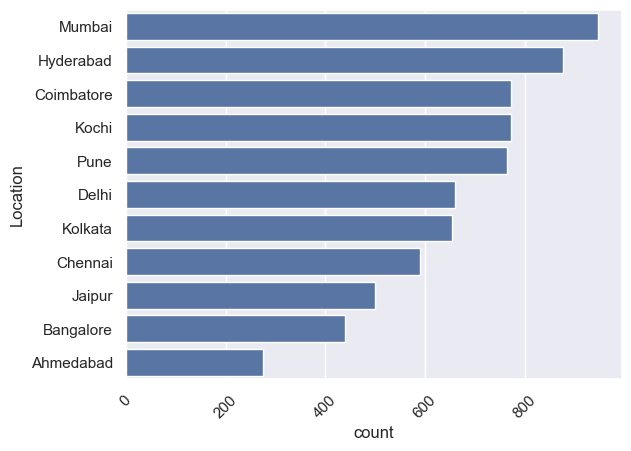

In [51]:
p = sns.countplot(data['Location'], order=data['Location'].value_counts().index);
plt.xticks(rotation=45);

There are 11 distinct locations. Mumbai is the most frequent location, and Ahmedabad the least frequent

##### 6.3.2.2 Transmission

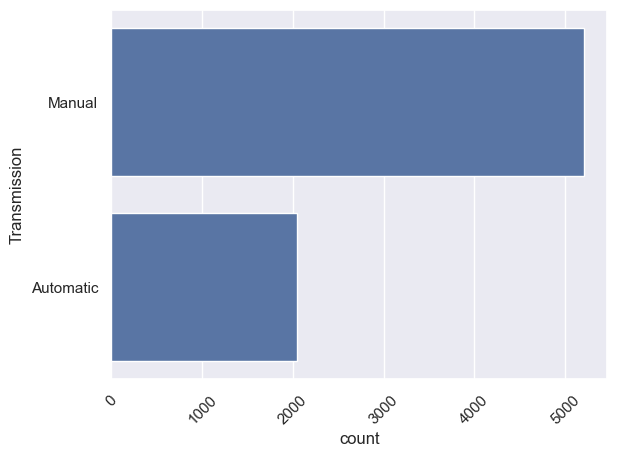

In [52]:
p = sns.countplot(data['Transmission'], order=data['Transmission'].value_counts().index);
plt.xticks(rotation=45);

There are 2 distinct Transmission values, Manual and Automatic. Manual corresponds to the 72% of the cars

##### 6.3.2.3 Owner Type

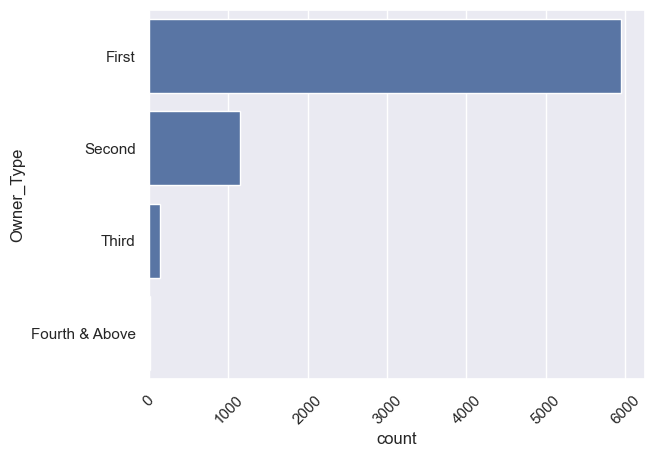

In [53]:
p = sns.countplot(data['Owner_Type'], order=data['Owner_Type'].value_counts().index);
plt.xticks(rotation=45);

There are 4 distinct categories for owner type. First owner corresponds to 82% of the rows

##### 6.3.2.4 Fuel Type

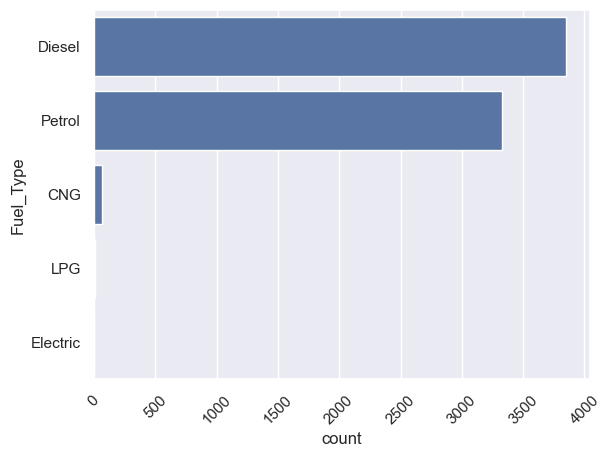

In [54]:
p = sns.countplot(data['Fuel_Type'], order=data['Fuel_Type'].value_counts().index);
plt.xticks(rotation=45);

There are 5 distinct Fuel Types. Diesel is the most frequent location, and there are only 2 electric cars

##### 6.3.2.5 Brand

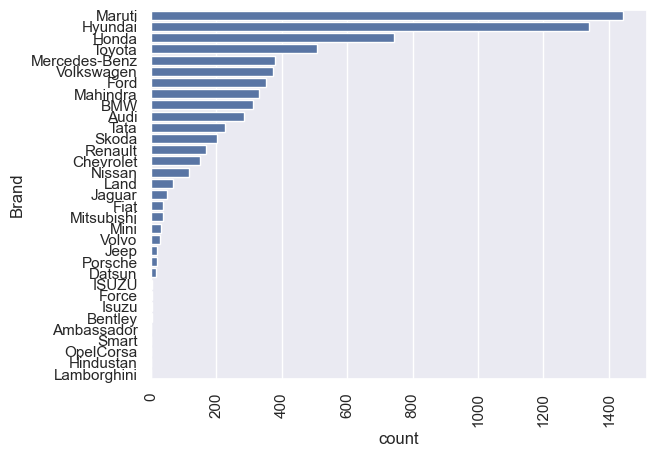

In [55]:
p = sns.countplot(data['Brand'], order=data['Brand'].value_counts().index);
plt.xticks(rotation=90);

There are 33 distinct Brands. Maruti, Hyundai, Honda and Toyota the most common ones.

### 6.4 Bivariate analysis

In [57]:
# Get correlation matrix for numeric variables
data.select_dtypes(include=np.number).corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.187884,0.322452,-0.054726,0.013448,0.008166,-0.058798,0.305327
Kilometers_Driven,-0.187884,1.000000,-0.069125,0.094816,0.030165,0.090218,-0.008221,-0.011493
Mileage,0.322452,-0.069125,1.000000,-0.593581,-0.531770,-0.310649,-0.378327,-0.306593
Engine,-0.054726,0.094816,-0.593581,1.000000,0.859777,0.399256,0.735981,0.658354
Power,0.013448,0.030165,-0.531770,0.859777,1.000000,0.095910,0.877708,0.772566
Seats,0.008166,0.090218,-0.310649,0.399256,0.095910,1.000000,-0.019459,0.052225
New_Price,-0.058798,-0.008221,-0.378327,0.735981,0.877708,-0.019459,1.000000,0.871847
Price,0.305327,-0.011493,-0.306593,0.658354,0.772566,0.052225,0.871847,1.000000


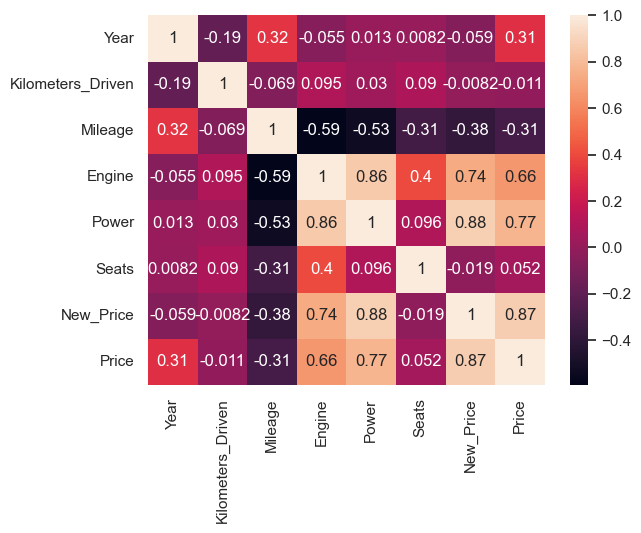

In [59]:
# Display correlation matrix in a heatmap
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True);

- Engine has a strong correlation with Power, New_Price and Price
- Power has a strong correlation with Engine, New_Price and Price
- New_price has a strong correlation with Engine, Power and Price
- Price has a strong correlation with Engine, Power and New Price

#### 6.4.1 Engine, Power and Price relationship

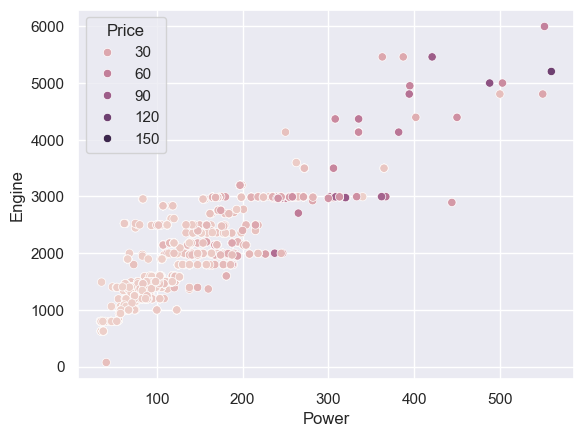

In [60]:
sns.scatterplot(data=data, x='Power', y='Engine', hue='Price');

There is a strong correlation between Power and Engine. The chart is also showing that more expensive cars tend to have high values for Power and Engine

#### 6.4.2 Power, Seats and Price relationship

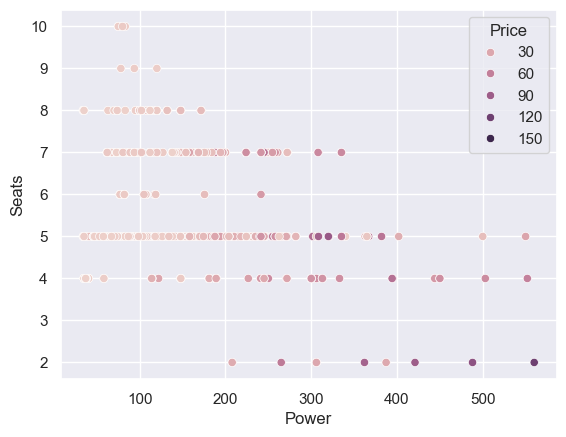

In [61]:
sns.scatterplot(data=data, x='Power', y='Seats', hue='Price');

There is not a clear relationship between Power and Seats. However, cars with 2 seats could have strong power and higher prices.

#### 6.4.3 Price and Brand

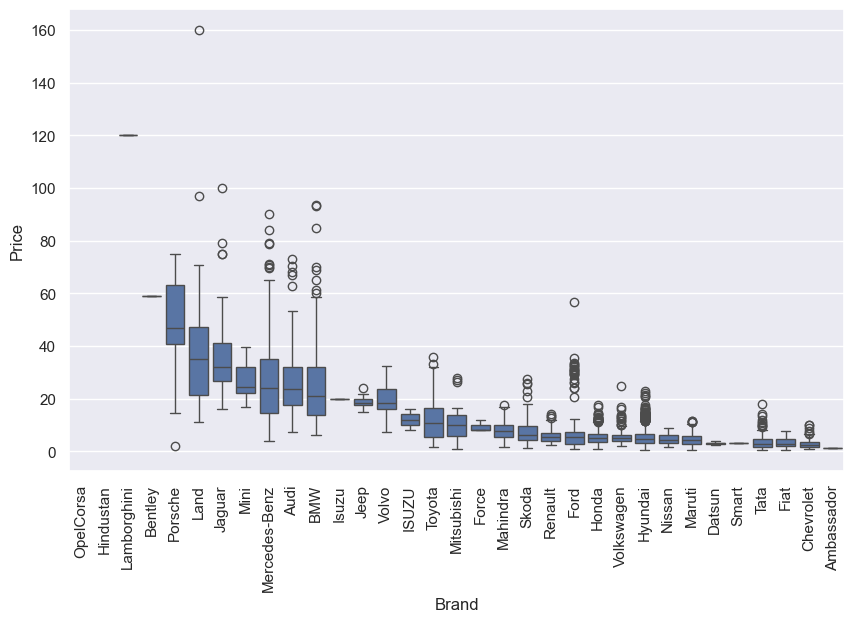

In [64]:
order_by_brand = data.groupby(by=["Brand"])["Price"].median().sort_values().iloc[::-1].index
plt.figure(figsize=(10,6));
plt.xticks(rotation=90);
sns.boxplot(x=data['Brand'], y=data['Price'], order=order_by_brand);

This chart shows there are:
- Luxury brands that have high prices: BMW, Audi, Mercedes-Benz, Mini, Jaguar, Land, Porsche, Bentley, Lamborghini, Isuzu
- Brands with medium prices: Ford, Renault, Skoda, Mahindra, Force, Mitsubishi, Toyota, ISUZU, Volvo, Jeep
- Brands with low prices: Ambassador, Chevrolet, Fiat, Tata, Smart, Datsun, Maruti, Nissan, Hyundai, Volkswagen, Honda

#### 6.4.4 Price, Location and Fuel Type

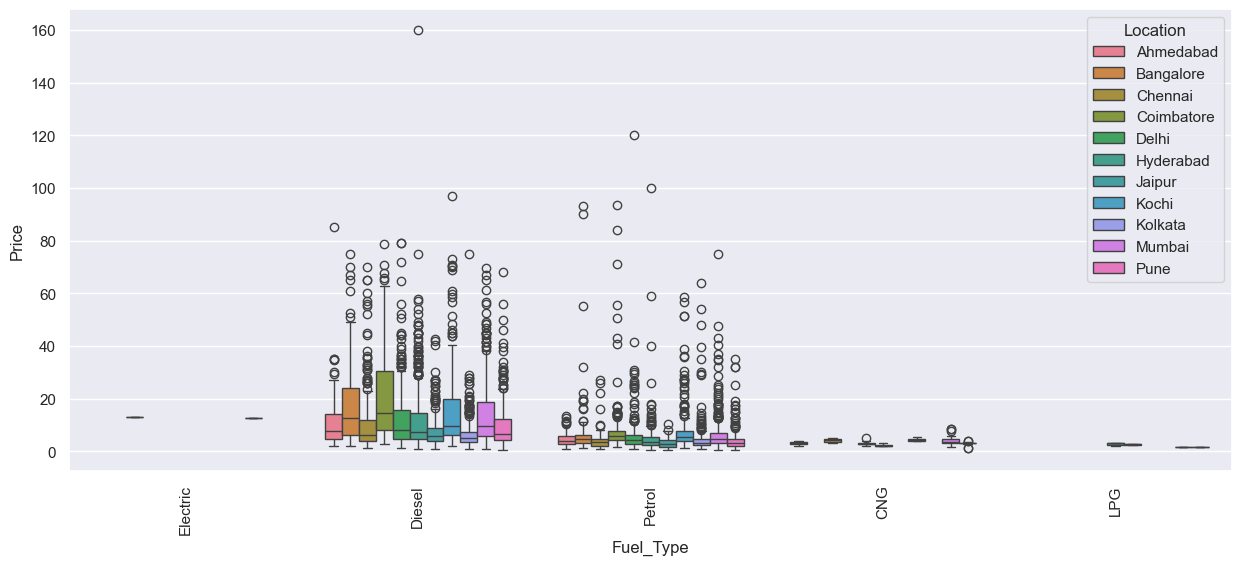

In [65]:
order_by_loc = data.groupby(by=["Fuel_Type"])["Price"].median().sort_values().iloc[::-1].index
plt.figure(figsize=(15,6));
plt.xticks(rotation=90);
sns.boxplot(x=data['Fuel_Type'], y=data['Price'], hue=data['Location'], order=order_by_loc);

- Electric and Diesel cars have higher Price than Petrol, CNG and LPG. 
- Cars in Bangalore, Coimbatore, Kochi and Mumbai tend to have higher prices than other locations

## 7 Missing Value Treatment

First we are going to drop column `New_Price` since it has 6247(86.1%) rows with missing data.

In [66]:
data.drop(['New_Price'], axis=1, inplace=True)

There are 1234 rows with missing Prices. We are going to drop all those rows because Price is the variable we would like to predict and we don't want to create artificial information in the model

In [67]:
data.drop(data[data['Price'].isna()].index, axis=0, inplace=True)

Let's check new data set

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6017 non-null   float64 
 7   Engine             5983 non-null   float64 
 8   Power              5876 non-null   float64 
 9   Seats              5977 non-null   float64 
 10  Price              6019 non-null   float64 
 11  Brand              6019 non-null   category
 12  Model              6019 non-null   category
 13  Specs              6019 non-null   category
dtypes: category(7), float64(5), int64(2)
memory usage: 520.4 KB


In [69]:
# counting the number of missing values per row
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    5872
1     107
3      36
2       4
Name: count, dtype: int64

We are going to analyze if there is a pattern for the 36 rows with 3 missing values. 

In [70]:
data[num_missing == 3]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Specs
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda,City,1.5 GXI
208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti,Swift,1.3 VXi
733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti,Swift,1.3 VXi
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land,Rover,Range Rover 3.0 D
1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda,City,1.3 DX
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti,Swift,1.3 ZXI
1385,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda,City,1.5 GXI
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land,Rover,Range Rover Sport 2005 2012 Sport
2074,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15,Maruti,Swift,1.3 LXI
2096,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93,Hyundai,Santro,LP zipPlus


Now, we are going to get the columns with missing values

In [71]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'Rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n')
        

Rows with exactly 1 missing values, NAs are found in:
Mileage      2
Power      103
Seats        2
dtype: int64


Rows with exactly 2 missing values, NAs are found in:
Power    4
Seats    4
dtype: int64


Rows with exactly 3 missing values, NAs are found in:
Engine    36
Power     36
Seats     36
dtype: int64




Now, let's calculate the percentage of missing values per column

In [72]:
# percentage of missing values
data.isnull().sum(axis=0)

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Brand                  0
Model                  0
Specs                  0
dtype: int64

- `Engine`, `Power`, `Seats` and `Mileage` columns have missing values.
- `Power` column has 143 rows (2.5% of rows) with missing values.
- Since the percentage of missing values is lower than 3% for all columns, we are going to impute missing values with the k-Nearest Neighbors using KKNImputer. 
- We select the k-Nearest Neighbors instead of the mean to avoid the influence of outliers in those columns

In [74]:
# load KNNImputer 
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [75]:
# create data set with only numeric columns
data_n = data.select_dtypes(include=np.number)
data_n_cols = data_n.columns.tolist()
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6019 non-null   int64  
 1   Kilometers_Driven  6019 non-null   int64  
 2   Mileage            6017 non-null   float64
 3   Engine             5983 non-null   float64
 4   Power              5876 non-null   float64
 5   Seats              5977 non-null   float64
 6   Price              6019 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 376.2 KB


In [76]:
# input values with KNNImputer
data_n = pd.DataFrame(imputer.fit_transform(data_n), columns=data_n_cols)
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6019 non-null   float64
 1   Kilometers_Driven  6019 non-null   float64
 2   Mileage            6019 non-null   float64
 3   Engine             6019 non-null   float64
 4   Power              6019 non-null   float64
 5   Seats              6019 non-null   float64
 6   Price              6019 non-null   float64
dtypes: float64(7)
memory usage: 329.3 KB


In [77]:
# replace columns with new imputed columns
data['Power'] = data_n['Power']
data['Mileage'] = data_n['Mileage']
data['Engine'] = data_n['Engine']
data['Seats'] = data_n['Seats']
#check there are not missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             6019 non-null   float64 
 8   Power              6019 non-null   float64 
 9   Seats              6019 non-null   float64 
 10  Price              6019 non-null   float64 
 11  Brand              6019 non-null   category
 12  Model              6019 non-null   category
 13  Specs              6019 non-null   category
dtypes: category(7), float64(5), int64(2)
memory usage: 520.4 KB


There are no data missing and we can continue with the analysis

## 8 Log Transformation
### 8.1 Kilometers_Driven
Kilometers_Driven column is very skewed. We are going to use the log transformation to improve the distribution

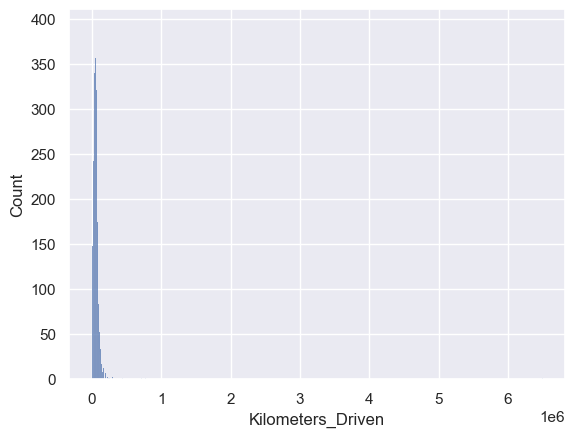

In [78]:
sns.histplot(data['Kilometers_Driven']);

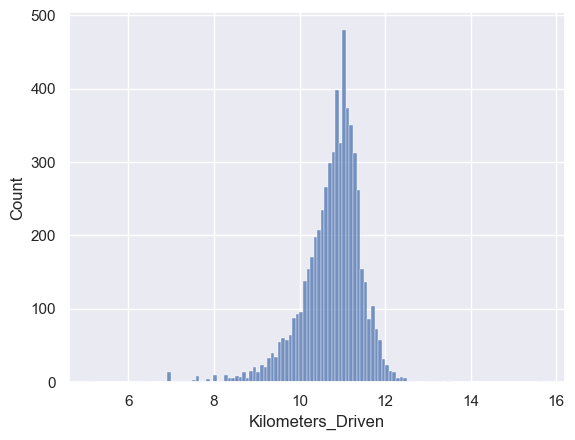

In [79]:
# distribution of the log transformation
sns.histplot(np.log(data['Kilometers_Driven']));

We can see a very good improvement in the distribution. Now, we are going to create a new column with the log of Kilometers_Driven and drop the Kilometers_Driven column

In [80]:
data['Kilometers_Driven_log'] = np.log(data['Kilometers_Driven'])
data.drop('Kilometers_Driven', axis=1, inplace=True)

In [81]:
# stats for new Kilometers_Driven_log column
data['Kilometers_Driven_log'].describe()

count    6019.000000
mean       10.758780
std         0.715788
min         5.141664
25%        10.434116
50%        10.878047
75%        11.198215
max        15.687313
Name: Kilometers_Driven_log, dtype: float64

In [82]:
data['Kilometers_Driven_log'].skew()

-1.29076524053299

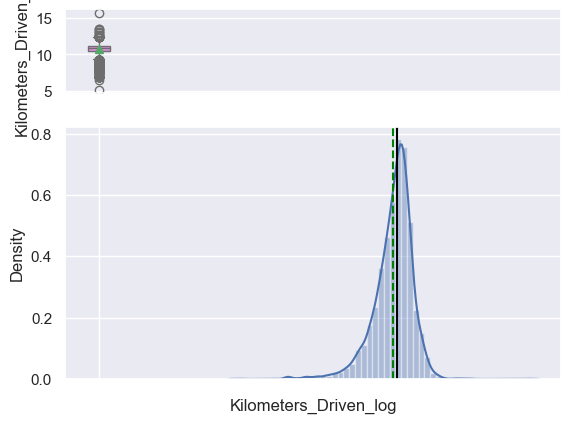

In [83]:
# creating the 2 subplots
f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                       sharex = True, # x-axis will be shared among all subplots
                                       gridspec_kw = {"height_ratios": (.25, .75)});
sns.boxplot(data['Kilometers_Driven_log'], ax=ax_box2, showmeans=True, color='violet'); # boxplot 
sns.distplot(data['Kilometers_Driven_log'], kde=True, ax=ax_hist2); # histogram
ax_hist2.axvline(np.mean(data['Kilometers_Driven_log']), color='green', linestyle='--'); # Add mean to the histogram
ax_hist2.axvline(np.median(data['Kilometers_Driven_log']), color='black', linestyle='-');

There are several values flagged as suspicious by the boxplot for the Kilometers_Driven_log column. There are some outliers above 14, but the rest of the points aren't inconsistent with the overall distribution of the data.

### 8.2 Power
Power column is skewed. We are going to use the log transformation to improve the distribution

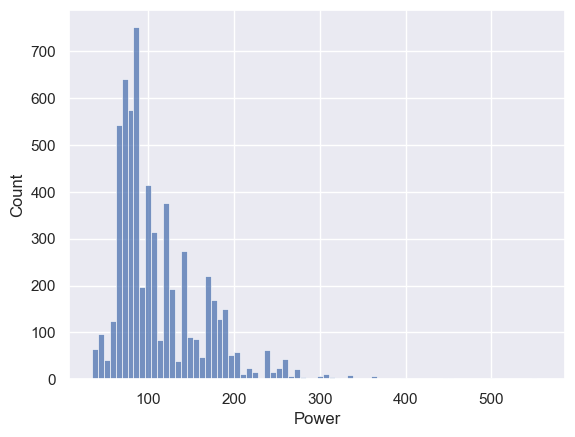

In [84]:
sns.histplot(data['Power']);

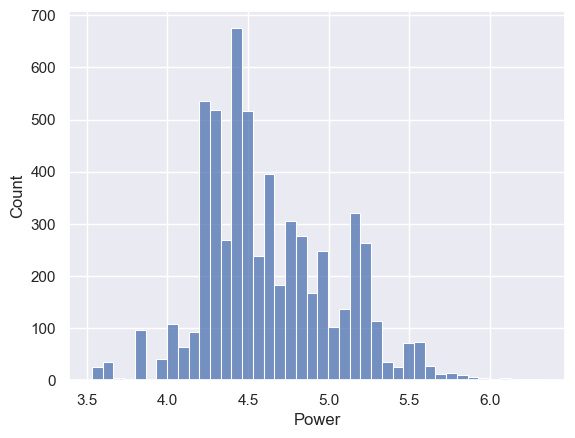

In [85]:
# distribution of the log transformation
sns.histplot(np.log(data['Power']));

We can see an improvement in the distribution. Now, we are going to create a new column with the log of Power and drop the Power column

In [86]:
data['Power_log'] = np.log(data['Power'])
data.drop('Power', axis=1, inplace=True)

In [87]:
# stats for new Kilometers_Driven_log column
data['Power_log'].describe()

count    6019.000000
mean        4.635187
std         0.414201
min         3.532226
25%         4.317488
50%         4.543295
75%         4.927978
max         6.327937
Name: Power_log, dtype: float64

In [88]:
data['Power_log'].skew()

0.46088996911606844

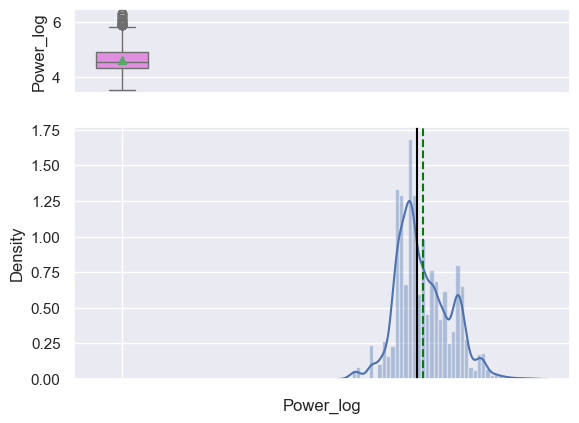

In [89]:
# creating the 2 subplots
f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                       sharex = True, # x-axis will be shared among all subplots
                                       gridspec_kw = {"height_ratios": (.25, .75)});
sns.boxplot(data['Power_log'], ax=ax_box2, showmeans=True, color='violet'); # boxplot 
sns.distplot(data['Power_log'], kde=True, ax=ax_hist2); # histogram
ax_hist2.axvline(np.mean(data['Power_log']), color='green', linestyle='--'); # Add mean to the histogram
ax_hist2.axvline(np.median(data['Power_log']), color='black', linestyle='-');

There are several values flagged as suspicious by the boxplot for the Power_log column. However, those points aren't inconsistent with the overall distribution of the data.

### 8.3 Engine
Engine column is skewed. However, the log transformation does not improve the distribution

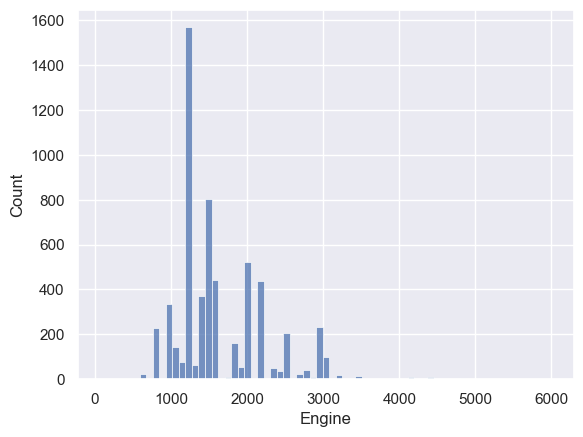

In [90]:
sns.histplot(data['Engine']);

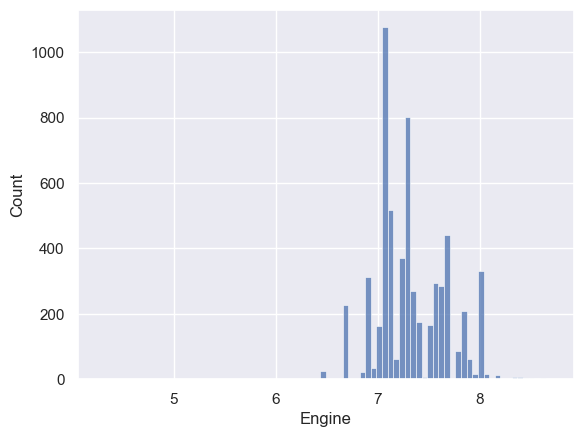

In [91]:
# distribution of the log transformation
sns.histplot(np.log(data['Engine']));

We do not see an improvement in the distribution, and we are going to keep the original column

### 8.4 Price
Price column is skewed. We are going to use the log transformation to improve the distribution

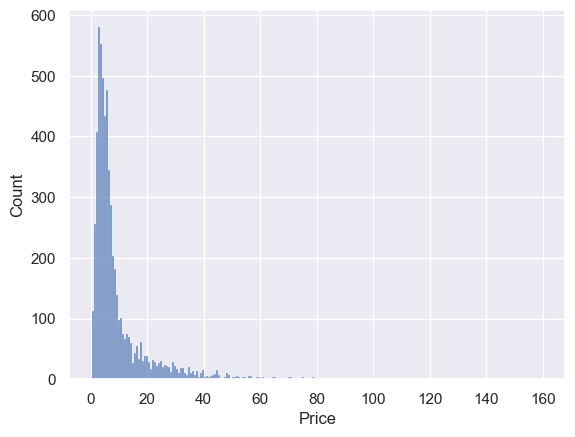

In [92]:
sns.histplot(data['Price']);

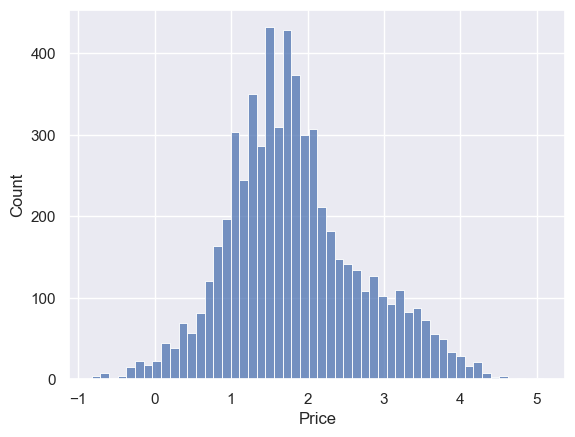

In [93]:
# distribution of the log transformation
sns.histplot(np.log(data['Price']));

We can see an improvement in the distribution. Now, we are going to create a new column with the log of Price and drop the Price column

In [94]:
data['Price_log'] = np.log(data['Price'])
data.drop('Price', axis=1, inplace=True)

In [95]:
# stats for new Kilometers_Driven_log column
data['Price_log'].describe()

count    6019.000000
mean        1.825095
std         0.874059
min        -0.820981
25%         1.252763
50%         1.729884
75%         2.297573
max         5.075174
Name: Price_log, dtype: float64

In [96]:
data['Price_log'].skew()

0.4173906918413524

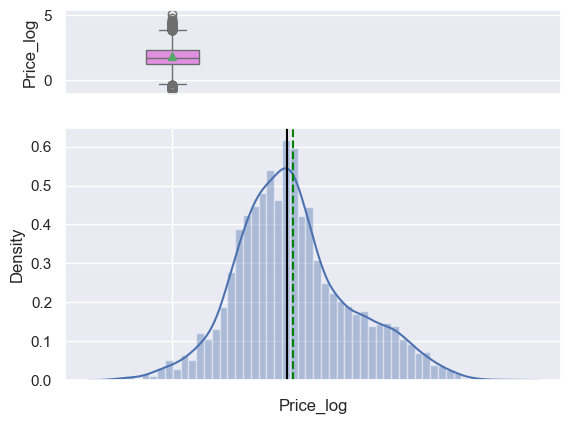

In [97]:
# creating the 2 subplots
f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                       sharex = True, # x-axis will be shared among all subplots
                                       gridspec_kw = {"height_ratios": (.25, .75)});
sns.boxplot(data['Price_log'], ax=ax_box2, showmeans=True, color='violet'); # boxplot 
sns.distplot(data['Price_log'], kde=True, ax=ax_hist2); # histogram
ax_hist2.axvline(np.mean(data['Price_log']), color='green', linestyle='--'); # Add mean to the histogram
ax_hist2.axvline(np.median(data['Price_log']), color='black', linestyle='-');

## 9 Outliers Treatment 

### 9.1 Kilometers_Driven

Kilometers_Driven_log have some outliers above 14. We are going to replace those values with the median

In [98]:
# replacing zeros with mean
data.loc[data['Kilometers_Driven_log']>14,'Kilometers_Driven_log'] = data['Kilometers_Driven_log'].mean()

### 9.2 Mileage

Mileage column have several rows with value equals zero. We are going to replace those values with the median

In [99]:
# replacing zeros with mean
data.loc[data['Mileage']==0,'Mileage'] = data['Mileage'].mean()

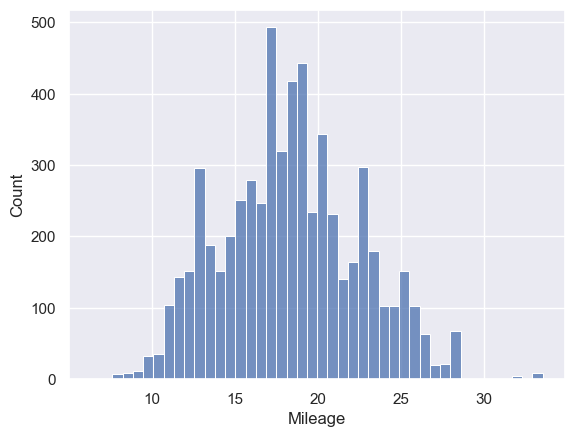

In [100]:
# check new distribution
sns.histplot(data['Mileage']);

In [101]:
data['Mileage'].describe()

count    6019.000000
mean       18.340122
std         4.151511
min         6.400000
25%        15.400000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

### 9.3 Seats
There is one 1 car with 0 seats. We are going to replace this value with the mean

In [102]:
data[data['Seats']==0]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Brand,Model,Specs,Kilometers_Driven_log,Power_log,Price_log
3999,Hyderabad,2012,Petrol,Automatic,First,10.5,3197.0,0.0,Audi,A4,3.2 FSI Tiptronic Quattro,11.736069,5.084134,2.890372


In [103]:
# replacing zeros with mean
data.loc[data['Seats']==0,'Seats'] = data['Seats'].mean()

## 10 Model Building

First, we are going to drop column Specs because it has high cardinality (1893 distinct values)

In [104]:
data.drop(['Specs'], axis=1, inplace=True)

In [105]:
# check there are not missing values and columns are the correcy type
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               6019 non-null   category
 1   Year                   6019 non-null   int64   
 2   Fuel_Type              6019 non-null   category
 3   Transmission           6019 non-null   category
 4   Owner_Type             6019 non-null   category
 5   Mileage                6019 non-null   float64 
 6   Engine                 6019 non-null   float64 
 7   Seats                  6019 non-null   float64 
 8   Brand                  6019 non-null   category
 9   Model                  6019 non-null   category
 10  Kilometers_Driven_log  6019 non-null   float64 
 11  Power_log              6019 non-null   float64 
 12  Price_log              6019 non-null   float64 
dtypes: category(6), float64(6), int64(1)
memory usage: 429.4 KB


### 10.1 Define independent and dependent variables

In [106]:
ind_vars = data.drop(["Price_log"], axis=1)
dep_var = data[["Price_log"]]

### 10.2 Creating dummy variables

In [107]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()


,Year,Mileage,Engine,Seats,Kilometers_Driven_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO
0,2010,26.60,998.0,5.0,11.184421,4.063198,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015,19.67,1582.0,5.0,10.621327,4.837868,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2011,18.20,1199.0,5.0,10.736397,4.485260,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2012,20.77,1248.0,7.0,11.373663,4.485936,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2013,15.20,1968.0,5.0,10.613246,4.947340,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [108]:
ind_vars_num.shape

(6019, 274)

The independent set has 6019 rows and 274 columns

### 10.3 Split the data into train and test

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create train and test data sets
x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)


# Create train and test data sets
x_train3, x_test3, y_train3, y_test3 = train_test_split(
    ind_vars_num, dep_var, test_size=0.2, random_state=10
)

In [110]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in train data = 1806


### 10.4 Fitting a linear model
Now, we are going to run the linear regression using the train data set

In [111]:
# Run Linear Regression
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

### 10.5 Performance of the model
First, we are going to calculate the $R^2$ for the train and test sets

In [112]:
# R^2 train set
lin_reg_model.score(x_train, y_train)

0.9587840089626443

In [113]:
# R^2 test set
lin_reg_model.score(x_test, y_test)

0.959104503710836

In [114]:
def r2(y,y_predict):
    e = y-y_predict
    ym = np.mean(y)
    v = y-ym
    e2 = np.sum(e*e)
    v2 = np.sum(v*v)
    return 1-(e2/v2)

In [115]:
r2(y_train,lin_reg_model.predict(x_train))

Price_log    0.958784
dtype: float64

In [116]:
r2(y_test,lin_reg_model.predict(x_test))

Price_log    0.959105
dtype: float64

In [117]:
r2(np.exp(y_train),np.exp(lin_reg_model.predict(x_train)))

Price_log    0.922877
dtype: float64

In [118]:
r2(np.exp(y_test),np.exp(lin_reg_model.predict(x_test)))

Price_log    0.908336
dtype: float64

The $R^2$ for the train set is 0.958 and for the test set is 0.958. Both values are comparable and very similar. Therefore, the model is not overfitting and the performance is very good

#### 10.5.1 Performance metrics
User functions to calculate performance metrics

In [119]:
# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values
    
    #Dictionary with metrics
    metrics = {"RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
               "MAE": mean_absolute_error(y_act, y_pred),
               "R^2": r2_score(y_act, y_pred),
               "Adjusted R^2": adj_r2(inp, y_act, y_pred)}
    return metrics

In [120]:
# Model performance on train set
model_perf(lin_reg_model, x_train, y_train)

{'RMSE': 0.1770842726656583,
 'MAE': 0.12405596763815441,
 'R^2': 0.9587840089626443,
 'Adjusted R^2': 0.9559162635222594}

In [121]:
# Model performance on test set
model_perf(lin_reg_model, x_test, y_test)

{'RMSE': 0.17745658563106884,
 'MAE': 0.12829130869663247,
 'R^2': 0.959104503710836,
 'Adjusted R^2': 0.9517855187446499}

We can conclude that the model is not overfitting since all metrics are comparable in both train and test sets. The model is able to predict Prices with a mean error of 0.129 on the test set

#### 10.5.2 Residuals distribution

##### Train set residuals

Now, we are going to analyze the distribution of the residuals

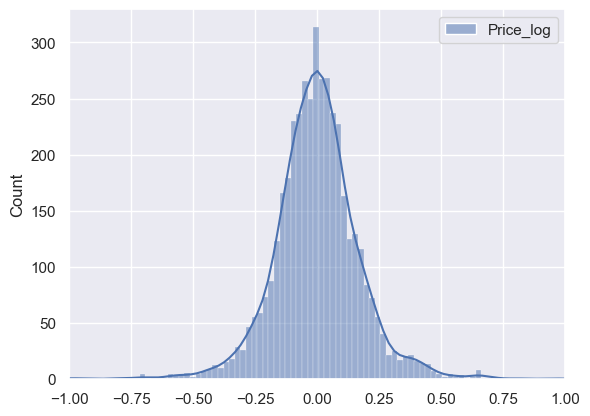

In [122]:
# train set residuals distribution
residuals_train = lin_reg_model.predict(x_train) - y_train
hplot = sns.histplot(residuals_train, kde=True);
hplot.set_xlim(-1,1);

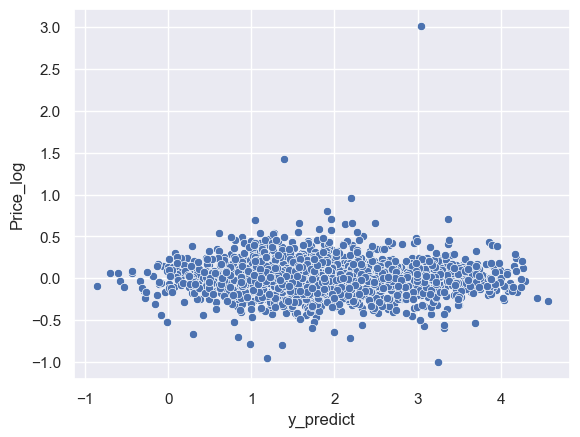

In [123]:
# scatterplot between residuals and predicted variables
y_train_predict = pd.DataFrame(lin_reg_model.predict(x_train), columns=['y_predict'])
sns.scatterplot(x=y_train_predict['y_predict'], y=residuals_train['Price_log']);

The scatter plot is random and therefore the model does not violate the assumption of Homoscedasticity

##### Test set residuals

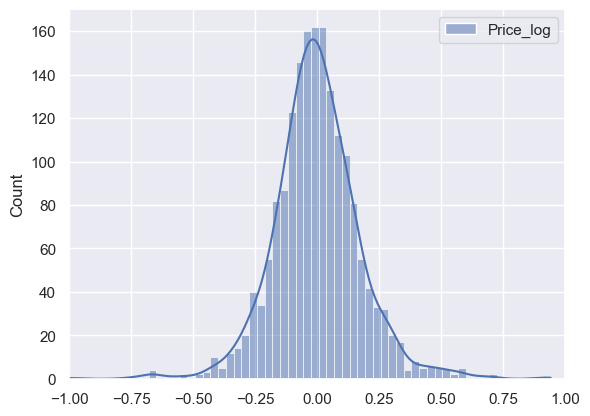

In [124]:
residuals_test = lin_reg_model.predict(x_test) - y_test
hplot = sns.histplot(residuals_test, kde=True);
hplot.set_xlim(-1,1);

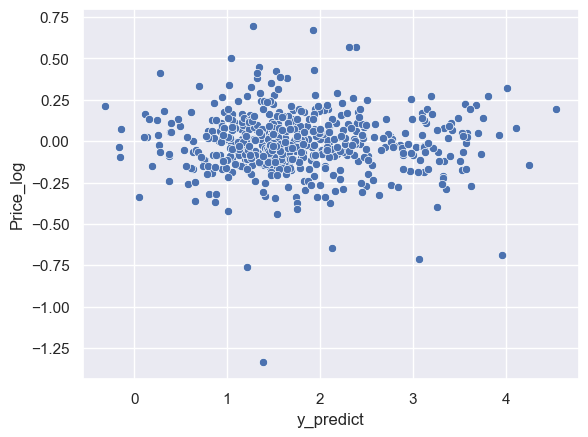

In [125]:
# scatterplot between residuals and predicted variables
y_test_predict = pd.DataFrame(lin_reg_model.predict(x_test), columns=['y_predict'])
sns.scatterplot(x=y_test_predict['y_predict'], y=residuals_test['Price_log']);

The scatter plot is random and therefore the model does not violate the assumption of Homoscedasticity

### 10.6 Coefficients and Intercept of the model

In [126]:
# Create data frame with coefficients
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
# Display all coefficients
pd.set_option('display.max_rows', coef_df.shape[0]+1)
coef_df

,Coefficients
Year,1.061775e-01
Mileage,1.316338e-03
Engine,-4.557528e-05
Seats,-1.807394e-04
Kilometers_Driven_log,-7.715894e-02
Power_log,3.782705e-01
Location_Bangalore,1.767534e-01
Location_Chennai,5.678747e-02
Location_Coimbatore,1.474313e-01
Location_Delhi,-8.008404e-02


#### 10.6.1 Coefficients Interpretation
##### Positive impact
This is the list of coefficients with positive impact on prices. Among them are Year, Mileage and Power_log. Increase in these will lead to an increase in the price.

In [127]:
coef_df[coef_df['Coefficients']>0].sort_values(by='Coefficients', ascending=False)

,Coefficients
Model_Mustang,1.576728e+00
Brand_Lamborghini,1.184292e+00
Model_Gallardo,1.184292e+00
Model_6,1.121772e+00
Model_Santa,1.029070e+00
Model_X6,9.909875e-01
Brand_Bentley,9.889603e-01
Model_Continental,9.889603e-01
Model_Z4,9.327412e-01
Model_Elantra,8.812794e-01


##### Negative impact
This is the list of coefficients with negative impact on prices. Among them are Kilometers_Drive_log, Engine and Seats. Increase in these will lead to a decrease in the price

In [128]:
coef_df[coef_df['Coefficients']<0].sort_values(by='Coefficients')

,Coefficients
Intercept,-2.122822e+02
Brand_Hyundai,-1.140057e+00
Model_Nano,-1.066021e+00
Brand_Datsun,-1.033328e+00
Brand_Fiat,-9.095028e-01
Model_Indica,-8.287199e-01
Brand_Chevrolet,-7.607063e-01
Model_Indigo,-7.456837e-01
Model_Etios,-7.384430e-01
Brand_Ford,-7.306453e-01


#### 10.6.2 Analysis of coefficients
- As expected, Year (most recent) has a positive impact on Price.
- As expected, Kilometers_Driven has a negative impact on Price.
- Power has a positive impact on Price. 
- Seats and Engine have a negative impact on Price.
- There are some locations with positive impact on Price: Bangalore, Chennai, Coimbatore and Hyderabad
- While, other locations have a negative impact on Price: Delhi, Jaipur, Kochi, Kolkata, Mumbai and Pune
- Diesel and Electric cars have a positive impact on Price
- Fuel LPG and Petrol have a negative impact on Price
- Manual transmission has a negative impact on Price
- Second, Third, Fourth and above owners have a negative impact on Price.
- The Brand and Model in luxury cars (Lamborghini, Jaguar, Porsche, etc) have a strong positive impact on Price.
- Economy Brands and Models (Datsun, Renault, Honda, Mahindra) have a negative impact on Price. 

## 11 Forward Feature Selection
### 11.1 Identify most important features

- There are 274 independent variables, and it is difficult to identify all key variables with strong relationship with Price. Therefore, we will select a subset of important features with forward feature selection using `SequentialFeatureSelector`

In [130]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [133]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 274 out of 274 | elapsed:   12.2s finished

[2024-10-30 15:22:54] Features: 1/274 -- score: 0.6008605735778773[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 242 out of 273 | elapsed:    5.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 273 out of 273 | elapsed:    5.9s finished

[2024-10-30 15:23:00] Features: 2/274 -- score: 0.8258189338417044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 272 out of 272 | elapsed:    5.9s finished

[2024-10-30 15:23:06] Features

Now, we are going to plot the score vs number of features

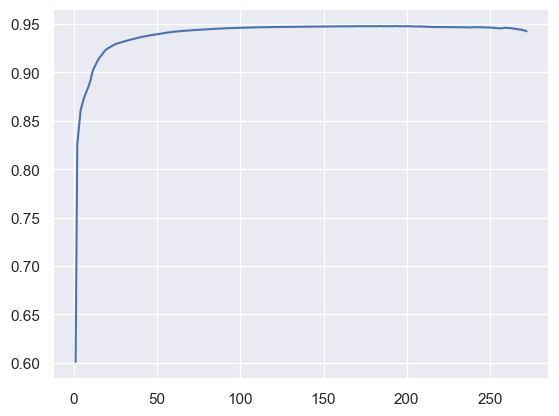

In [134]:
# score results
sfs_dict = sfs.get_metric_dict()
x = [i for i in sfs_dict]
y = [sfs_dict[i]['avg_score'] for i in sfs_dict]
# slice list to avoid last 2 extreme scores
x2 = x[0:272]
y2 = y[0:272]
sns.lineplot(x=x2, y=y2);

With 50 features the score is around 0.93, and it does not improve significantly with additional features. Actually, it decreases after 265 features.

In [135]:
reg = LinearRegression()

# Build step forward feature selection with 50 features
sfs = SFS(
    reg,
    k_features=20,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 274 out of 274 | elapsed:   12.2s finished

[2024-10-30 16:18:10] Features: 1/20 -- score: 0.6008605735778773[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 242 out of 273 | elapsed:    4.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 273 out of 273 | elapsed:    4.9s finished

[2024-10-30 16:18:15] Features: 2/20 -- score: 0.8258189338417044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 272 out of 272 | elapsed:    4.8s finished

[2024-10-30 16:18:20] Features: 

In [136]:
# Most important features
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 2, 4, 5, 6, 8, 10, 13, 19, 20, 24, 25, 27, 37, 40, 43, 44, 52, 53, 266]


In [137]:
x_train.columns[feat_cols]

Index(['Year', 'Engine', 'Kilometers_Driven_log', 'Power_log',
       'Location_Bangalore', 'Location_Coimbatore', 'Location_Hyderabad',
       'Location_Kolkata', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Brand_Audi', 'Brand_BMW', 'Brand_Chevrolet', 'Brand_Jaguar',
       'Brand_Land', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Tata',
       'Brand_Toyota', 'Model_Xylo'],
      dtype='object')

### 11.2 Retraining the model

New independent train and test sets with the 50 variables selected in the sequential feature selection

In [138]:
x_train_final = x_train[x_train.columns[feat_cols]]
x_test_final = x_test[x_train.columns[feat_cols]]

In [139]:
#check shape
x_train_final.shape

(4213, 20)

In [140]:
#check shape
x_test_final.shape

(1806, 20)

In [141]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.115198
Engine,0.000226
Kilometers_Driven_log,-0.074748
Power_log,0.778158
Location_Bangalore,0.183211
Location_Coimbatore,0.156587
Location_Hyderabad,0.180627
Location_Kolkata,-0.192565
Fuel_Type_Petrol,-0.198387
Transmission_Manual,-0.107517


#### 11.2.1 Model Performance

In [142]:
# R^2 train set
lin_reg_model2.score(x_train_final, y_train)

0.9261017957003274

In [143]:
# R^2 test set
lin_reg_model2.score(x_test_final, y_test)

0.9318611297475975

In [144]:
# Model performance on train set
model_perf(lin_reg_model2, x_train_final, y_train)

{'RMSE': 0.2371177477741038,
 'MAE': 0.17574233711503315,
 'R^2': 0.9261017957003274,
 'Adjusted R^2': 0.9257492279317221}

In [145]:
# Model performance on train set
model_perf(lin_reg_model2, x_test_final, y_test)

{'RMSE': 0.22906136480762884,
 'MAE': 0.1709946146974173,
 'R^2': 0.9318611297475975,
 'Adjusted R^2': 0.9310976690164782}

##### Observations
- The new regression model have 50 features that is 18% on the number of columns of the original regression model
- The performance of the new model is very close to the original model

### 11.3 Coefficient Interpretation

#### 11.3.1 Positive impact
This is the list of coefficients with positive impact on prices. Among them are Year, Power and Seats. Increase in these will lead to an increase in the price.

In [146]:
coef_df[coef_df['Coefficients']>0] 

,Coefficients
Year,0.115198
Engine,0.000226
Power_log,0.778158
Location_Bangalore,0.183211
Location_Coimbatore,0.156587
Location_Hyderabad,0.180627
Brand_Audi,0.571186
Brand_BMW,0.519360
Brand_Jaguar,0.607397
Brand_Land,0.887929


#### 11.3.2 Negative impact
This is the list of coefficients with negative impact on prices. Among them are Mileage, Engine and Kilometers_Drive_log. Increase in these will lead to a decrease in the price

In [147]:
coef_df[coef_df['Coefficients']<0]

,Coefficients
Kilometers_Driven_log,-0.074748
Location_Kolkata,-0.192565
Fuel_Type_Petrol,-0.198387
Transmission_Manual,-0.107517
Brand_Chevrolet,-0.278779
Brand_Tata,-0.406731
Model_Xylo,-0.500064
Intercept,-233.238329


#### 11.3.3 Observations
The impact of the different features on Price is similar than the original regression model

## 12 Actionable Insights & Recommendations

Cars4U should focus on trade:
- The business should focus to negotiate recent owned cars
- Cars with high power have a positive impact 
- Diesel and Electric cars are more valued than other fuel types
- Trade cars on specifics locations: Bangalore, Chennai, Coimbatore and Hyderabad
- If possible, focus on luxury cars and models (Lamborghini, Jaguar, Porsche, etc)

Cars4U should avoid:
- Cars with a large number of kilometers driven
- Trading on Delhi, Kochi, Kolkata and Mumbai
- LPG and Petrol cars
- Manual transmission cars
- Second and above owners cars
- Economy Brands and Models (Datsun, Renault, Honda, Mahindra)
